# HW2: Multivariate linear regression

HW2 is required to finish the following tasks based on this incomplete Notebook file. The final submission should include the completed code snippets, obtained results, and the given answers. You can get the PDF submission by "File -> Download as -> HTML," then open your downloaded HTML file via a browser and print the webpage as a PDF file.

- Given a dataset, implement a multivariate linear regression model and show the training/validation/testing MSE errors (30pts).
- Implement a Ridge regression based model on step 1 (20 pts)
- Tune the hyperparameter $\alpha$ of Ridge regression on the validation set. Plot training/validation MSE errors over the given range. (30 pts)  
- Choose one hyperparameter from step 3. Given the same hyperparameter, compare your Ridge regression model and the Sklearn-Ridge regression on the testing set. (20 pts)
---

## Preliminary

We start from a given dataset, digits, which has $N=1797$ samples with $D=64$ features. The digits dataset is generally used for a classification task. Here, however, we tailor it as a multivariate regression problem: we aim to predict the last 8 features upon the given 56 features, resulting in $\mathbf{X} \in \mathbb{R}^{1797 \times 56}$ and $\mathbf{Y} \in \mathbb{R}^{1797 \times 8}$. Linear/Ridge regression models learn $\mathbf{W} \in \mathbb{R}^{56 \times 8}: \mathbf{X} \rightarrow \mathbf{Y}$.

**Hint:** You may refer to the Lab 5 for solving the Q1. Think about the difference between (univariate) linear regression and multivariate linear regression.

In [2]:
%matplotlib inline

import numpy as np
from sklearn import linear_model
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

# We first split the dataset into training/vaidation/test
# load dataset
digits = load_digits()
# normalzied features to range [0,1]
data = digits.data / 16.
N, _ = data.shape
D = 56 # pre-defined feature dimension
X = data[:, :D]
Y = data[:, D:]
# random shuffle the data
np.random.seed(0)
ind = np.random.permutation(N)
# split the data as 0.6/0.2/0.2
n1, n2 = int(0.6*N), int(0.8*N)
X_trn, Y_trn = X[ind[:n1]], Y[ind[:n1]]
X_val, Y_val = X[ind[n1:n2]], Y[ind[n1:n2]]
X_tst, Y_tst = X[ind[n2:]], Y[ind[n2:]]
print(X_trn.shape)
print(Y_trn.shape)
print(ind)

(1078, 56)
(1078, 8)
[1081 1707  927 ... 1653  559  684]


In [3]:
def mse(y_hat, y):
    return ((y_hat-y)**2).sum()/len(y)

### Q1: Implement a multivariate linear regression model

$\mathcal{L}_{w} = \frac{1}{2} \|\mathbf{Y} - \mathbf{X}\mathbf{W}\|^{2}_{\mathrm{F}}$, $\mathbf{W}^{*} = \texttt{argmin}_{\mathbf{W}}\mathcal{L}_{w}=(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{Y}$

For a given matrix $\mathbf{A}$, $\|\mathbf{A}\|_{\mathrm{F}}$ is defined as $\|\mathbf{A}\|_{\mathrm{F}}=\sqrt{\sum_{i}\sum_{j}\mathbf{A}_{ij}^2}$. You may refer to [Matrix norm](https://en.wikipedia.org/wiki/Matrix_norm) for more details about the vector norm and matrix norm.

Note that, it is common to raise a "singular matrix error" when computing $(\mathbf{X}^{T}\mathbf{X})^{-1}$. One common trick is to compute $(\mathbf{X}^{T}\mathbf{X} + \epsilon \mathbf{I})^{-1}$ instead, where $\epsilon$ could be set as $1e-8$.

In [4]:
# TODO: get the predictions via your linear regression model

w_l = np.matmul(np.matmul(np.linalg.inv(np.add(np.matmul(np.transpose(X_trn), X_trn),(1e-8*np.identity(D)))), np.transpose(X_trn)), Y_trn)
print(w_l.shape)

y_trn_hat = np.matmul(X_trn, w_l)
y_val_hat = np.matmul(X_val, w_l)
y_tst_hat = np.matmul(X_tst, w_l)
# print the training/validation/testing MSE error by using the mse function
print("linear regression: training err={:.3f}, validation err ={:.3f}, testing err={:.3f}".format(mse(y_trn_hat,Y_trn), mse(y_val_hat, Y_val), mse(y_tst_hat, Y_tst)))

(56, 8)
linear regression: training err=0.148, validation err =0.161, testing err=0.166


### Q2: Implement a multivariate Ridge regression model
For Ridge regression, we have
$\mathcal{L}_{w} = \frac{1}{2}( \|\mathbf{Y} - \mathbf{X}\mathbf{W}\|_{\mathrm{F}}^{2} + \alpha \|\mathbf{W}\|_{\mathrm{F}}^{2}$), $\mathbf{W}^{*} = \texttt{argmin}_{\mathbf{W}}\mathcal{L}_{w}=(\mathbf{X}^{T}\mathbf{X} + \alpha \mathbf{I})^{-1}\mathbf{X}^{T}\mathbf{Y}$, 
where $\alpha > 0 $ is a trade-off hyperparameter balancing regression error and $\ell_2$ regularization.

In [5]:
# Todo: give the W solution for ridge regression
alpha = 150
X_scatter = np.matmul(X_trn.T, X_trn) + alpha*np.identity(D)


w_r = np.matmul(np.matmul(np.linalg.inv(X_scatter),np.transpose(X_trn)),Y_trn)
print(w_r.shape)


(56, 8)


### Q3: Tune the hyperparameter $\alpha$ on the validation set 
We may utilize the Sklearn implemntation for tuning the hyperparameter of a ridge regression model.

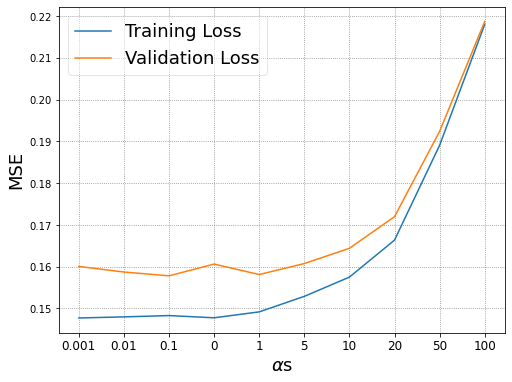

alpha with the lowest loss was 0.1


In [12]:
alphas = [0.001, 0.01, 0.1, 0, 1, 5, 10, 20, 50, 100]
loss_trns = []
loss_vals = []
for alpha in alphas:
    # instantiate a ridge regression model with a given alpha
    model = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    # TODO: training the model and get the training and validation loss for each alpha
    # train model?
    model.fit(X_trn, Y_trn)
    Y_model_trn = model.predict(X_trn)
    Y_model_val = model.predict(X_val)
    
    loss_trns.append(mse(Y_model_trn, Y_trn))
    loss_vals.append(mse(Y_model_val, Y_val))

fig, ax = plt.subplots(figsize=(8,6))
plt.grid(which='both',axis='both', color='grey',linestyle=':')

# TODO plot the training and validation loss below
plt.plot(loss_trns, label = "Training Loss")
plt.plot(loss_vals, label = "Validation Loss")

# TODO how to plot the best validation loss?
min_loss = min(loss_vals)
min_loss_index = loss_vals.index(min_loss)

# For example, if you want to hilight one horizontal line. 


plt.ylabel('MSE', fontsize=18)
plt.xlabel(r'${\alpha}$s', fontsize=18)
plt.xticks(np.arange(len(alphas)), alphas, fontsize=12)
# TODO: add a legend
plt.legend(fancybox=True, framealpha=0.5, fontsize=18)
plt.show()
print("alpha with the lowest loss was",alphas[min_loss_index])

### Q4: Compare your ridge regression model with the Sklearn implmentation

In [14]:
# TODO: select alpha from Q1-3
alpha = alphas[min_loss_index]
X_scatter = np.matmul(X_trn.T, X_trn) + alpha*np.identity(D)
w_r = np.matmul(np.matmul(np.linalg.inv(X_scatter),np.transpose(X_trn)),Y_trn)
# Given w_r from Q1-2

y_r_trn = np.matmul(X_trn, w_r)
y_r_val = np.matmul(X_val, w_r)
y_r_tst = np.matmul(X_tst, w_r)
# print the training/validation/testing MSE error by using the mse function
print("My Ridge Regression: training err={:.3f}, validation err ={:.3f}, testing err={:.3f}".format(mse(y_r_trn,Y_trn), mse(y_r_val, Y_val), mse(y_r_tst, Y_tst)))
# sklearn model with the same alpha
model = linear_model.Ridge(alpha=alpha, fit_intercept=False)
model.fit(X_trn, Y_trn)
Y_model_trn = model.predict(X_trn)
Y_model_val = model.predict(X_val)
Y_model_tst = model.predict(X_tst)
# train the model 
# print the training/validation/testing MSE error by using the mse function
print("Sklearn Ridge Regression: training err={:.3f}, validation err ={:.3f}, testing err={:.3f}".format(mse(Y_model_trn,Y_trn), mse(Y_model_val, Y_val), mse(Y_model_tst, Y_tst)))

My Ridge Regression: training err=0.148, validation err =0.158, testing err=0.165
Sklearn Ridge Regression: training err=0.148, validation err =0.158, testing err=0.165
